In [1]:
import sys
sys.path.append("..")

In [2]:
from tqdm.notebook import tqdm
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from set_transformer.layer import enc_dec

In [3]:
d_model = 64
d_ff = d_model * 4
n_head = 4
max_seq_len = 10
induc_p = max_seq_len
k = 1
pad_idx = 0
output_dim = 1
dropout_p = 0
n_enc_layer = 2
batch_size = 128

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
model = enc_dec.EncoderDecoder(
    d_model,
    d_ff,
    n_head,
    induc_p,
    k,
    pad_idx,
    output_dim,
    dropout_p,
    n_enc_layer).to(device)

___

In [5]:
def generate_input_set() : 
    batch_input_set = torch.zeros(batch_size, max_seq_len)
    label = torch.zeros(batch_size)

    for idx in range(batch_size) : 
        seq_len = random.randrange(1, max_seq_len+1)
        input_set = torch.rand(seq_len)
        batch_input_set[idx,:input_set.shape[0]] = input_set
        label[idx] = torch.max(input_set).item()
    return batch_input_set, label

In [6]:
criterion = nn.L1Loss() # MAE loss
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [7]:
loss_ls = []

for proc in tqdm(range(20000)) : 
    x, y = generate_input_set()
    
    optimizer.zero_grad()
    loss = criterion(model(x.to(device)).squeeze(), y.to(device))
    loss.backward()
    optimizer.step()
    
    loss_ls.append(loss.item())
    if proc % 1000 == 0: 
        print(f"Loss at process({proc}) : {sum(loss_ls) / len(loss_ls)}")

  0%|          | 0/20000 [00:00<?, ?it/s]

Loss at process(0) : 0.3312963843345642
Loss at process(1000) : 0.0531528740418846
Loss at process(2000) : 0.03361249235395839
Loss at process(3000) : 0.02608789377848927
Loss at process(4000) : 0.02184998139631263
Loss at process(5000) : 0.01923067325229297
Loss at process(6000) : 0.017319993651111205
Loss at process(7000) : 0.01583250892341803
Loss at process(8000) : 0.014680349137766736
Loss at process(9000) : 0.013687808452454571
Loss at process(10000) : 0.012885282004757082
Loss at process(11000) : 0.012252761491788278
Loss at process(12000) : 0.011628546589863186
Loss at process(13000) : 0.011095991583407294
Loss at process(14000) : 0.010652507457131307
Loss at process(15000) : 0.010231454359299756
Loss at process(16000) : 0.009858791825798546
Loss at process(17000) : 0.009517345479250199
Loss at process(18000) : 0.009230929610348047
Loss at process(19000) : 0.008964337538988325


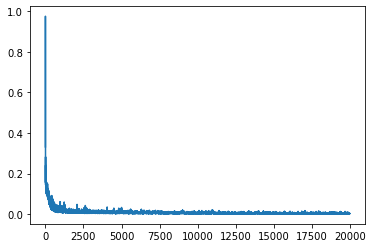

In [21]:
plt.plot(loss_ls)
plt.show()

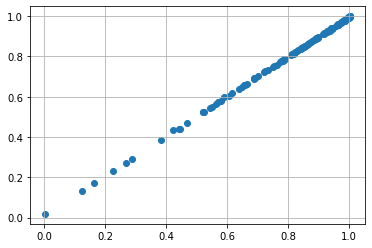

In [25]:
x, y = generate_input_set()
p = model(x.to(device))

plt.scatter(p.squeeze().cpu().data.numpy(), y)
plt.grid()
plt.show()